# Mezclas Gaussianas

In [ ]:
from PIL import Image
from skimage import io, segmentation, color
from sklearn.mixture import GaussianMixture
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import os
import pandas as pd

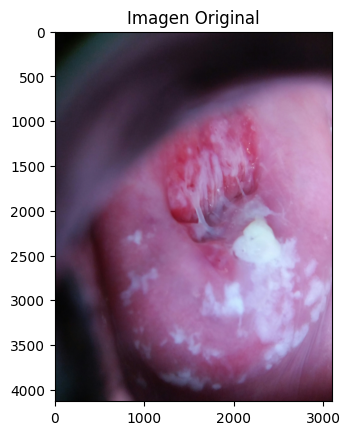

In [ ]:
# Cargar la imagen
img = cv2.imread('/content/126.jpg')
imagen_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

"""plt.figure()
plt.subplot(121)
plt.imshow(imagen_rgb)

plt.subplot(122)
plt.imshow(gray_image,'gray')

plt.show()
print(imagen_rgb.shape)"""
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ruta = "/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes"
lista_archivos = os.listdir(ruta)
lista_archivos[1]

In [ ]:
ruta_MG= '/content/drive/MyDrive/PROYECTO_GRADO/Mezclas_Gausianas'
lista_MG = os.listdir(ruta_MG)
len(lista_MG)

Archivos faltantes

In [ ]:
import os
def verificar_archivo_en_lista(lista_archivos, nombre_archivo):
    return nombre_archivo in lista_archivos

In [ ]:
rutaMG = "/content/drive/MyDrive/PROYECTO_GRADO/Mezclas_Gausianas/"
lista_archMG = os.listdir(rutaMG)
Archivos_faltantes = lista_archivos
for i in range (len(lista_archMG)):
  if verificar_archivo_en_lista(lista_archivos, lista_archMG[i]):
    Archivos_faltantes.remove(lista_archMG[i])

In [ ]:
len(Archivos_faltantes)

356

In [ ]:
def M_Gausianas(img):
  imagen = cv2.imread(img)
  imagen_rgb = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  imagen_gris =cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
  gmm = GaussianMixture(n_components=3,covariance_type = 'full',  init_params = 'kmeans')
  gmm.fit(imagen_gris.reshape(-1, 1))
  segmented = gmm.predict(imagen_gris.reshape(-1, 1))
  segmented = segmented.reshape(imagen_gris.shape)
  segmented = segmented.astype(bool)

  return segmented

In [ ]:
def guardar(imagenbn, nombreArchivo):
  # Convertir la máscara a objeto de imagen
  mask_image = Image.fromarray(imagenbn)

  # Guardar la máscara
  ruta = '/content/drive/MyDrive/PROYECTO_GRADO/Mezclas_Gausianas/' + nombreArchivo
  mask_image.save(ruta)


guardar Faltantes

In [ ]:
for i in range (len(Archivos_faltantes)):
  ArchivoF = Archivos_faltantes[i]
  #Ruta de imagen
  rutaImgF = '/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes/' + ArchivoF
  Mascara_MGFaltantes = M_Gausianas(rutaImgF)
  guardar(Mascara_MGFaltantes, ArchivoF)

guardar

In [ ]:
for i in range (len(lista_archivos)):
  Archivo = lista_archivos[i]
  #Ruta de imagen
  rutaImg = '/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes/' + Archivo
  Mascara_MG = M_Gausianas(rutaImg)
  guardar(Mascara_MG, Archivo)

# Nueva sección

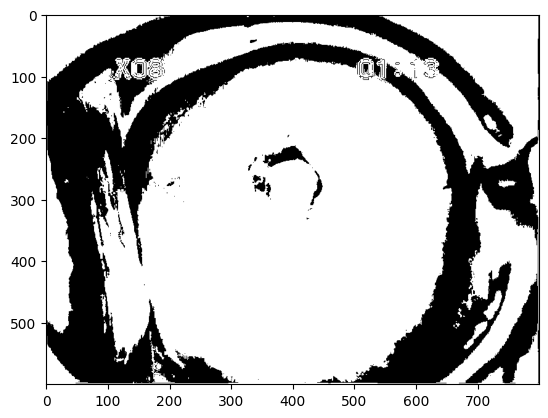

In [ ]:
Resultado = M_Gausianas('AAHE.jpg')
plt.imshow(Resultado,'gray')
plt.show()

(2832, 4256)
int64


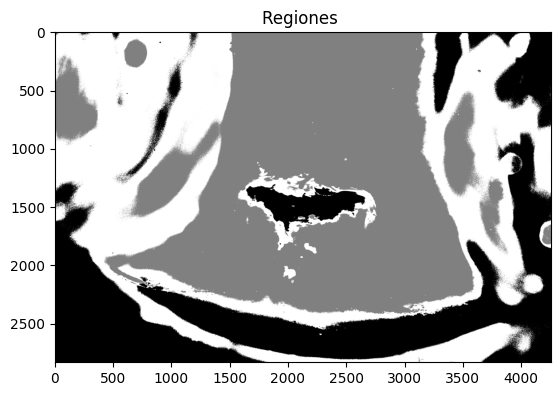

In [ ]:
# Aplicar el modelo de mezclas gaussianas
gmm = GaussianMixture(n_components=3,covariance_type = 'full',  init_params = 'kmeans')
gmm.fit(gray_image.reshape(-1, 1))
segmented = gmm.predict(gray_image.reshape(-1, 1))
segmented = segmented.reshape(gray_image.shape)
print(segmented.shape)
print(segmented.dtype)

# Visualizar la imagen segmentada
plt.imshow(segmented,'gray')
plt.title('Regiones ')
plt.show()

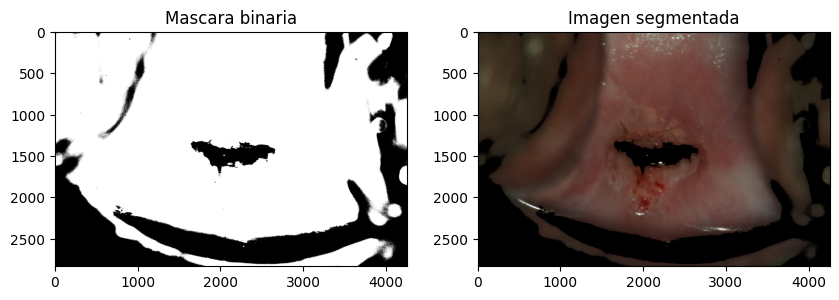

In [ ]:
# Convertir la máscara binaria a valores booleanos
segmented = segmented.astype(bool)

# Multiplicar la imagen por la máscara binaria
masked_image = np.zeros_like(imagen_rgb)
masked_image[segmented] = imagen_rgb[segmented]

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(segmented,'gray')
ax[0].set_title('Mascara binaria')
ax[1].imshow(masked_image)
ax[1].set_title('Imagen segmentada')
plt.show()


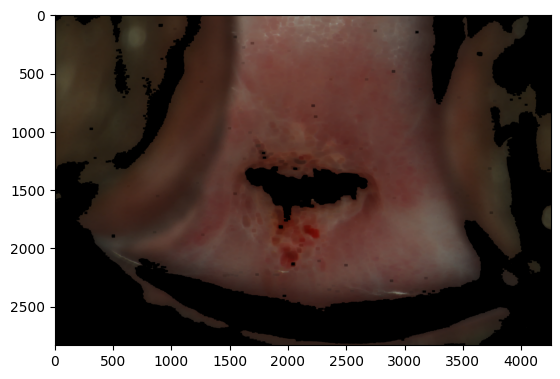

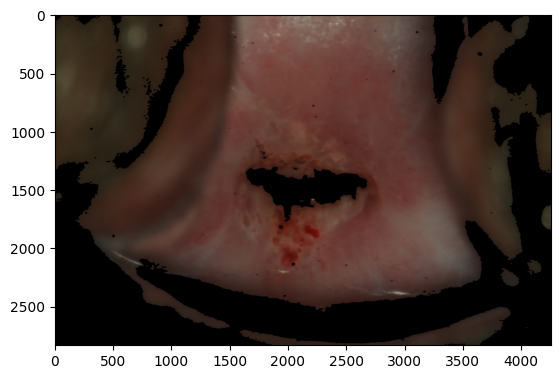

In [ ]:
kernel = np.ones((3,4),dtype='uint8') #devuelve matriz llena de unos 3*3
erosion = cv2.erode(masked_image,kernel,iterations = 8)#se usa para hacer erosiones en imagenes
dilata = cv2.dilate(erosion,kernel,iterations = 3)

plt.imshow(erosion)
plt.show()

plt.imshow(dilata)
plt.show()